<a href="https://colab.research.google.com/github/tarungoli26/data-visualization-0194-/blob/main/AP23110010194_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Univariate analysis for Numerical and Categorical data. Using dataset of your choice**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)



In [ ]:
# Download dataset
path = kagglehub.dataset_download("eshummalik/disney")

print("Dataset downloaded successfully!")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'disney' dataset.
Dataset downloaded successfully!
Path to dataset files: /kaggle/input/disney


In [ ]:
# Locate and load dataset
file_path = os.path.join(path, "/content/disney_plus_shows.csv")

# Read data into pandas DataFrame
df = pd.read_csv(file_path)

# Show basic info
df.head()


,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,NaN,2018–,25 Mar 2019,"February 28, 2020",NaN,"Animation, Comedy, Family",NaN,NaN,"Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",NaN,NaN,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,NaN,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"


In [ ]:
# Overview of data
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# Drop duplicate rows
df = df.drop_duplicates()

# Convert release year or date if present
if 'release_year' in df.columns:
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
elif 'release_date' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

df.info()


Shape of dataset: (992, 19)

Columns:
 ['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at', 'added_at', 'runtime', 'genre', 'director', 'writer', 'actors', 'language', 'country', 'awards', 'metascore', 'imdb_rating', 'imdb_votes']

Missing values:
 imdb_id         98
title           98
plot           126
type            98
rated          250
year            98
released_at    118
added_at         0
runtime        154
genre          107
director       303
writer         249
actors         122
language       136
country        123
awards         436
metascore      700
imdb_rating    113
imdb_votes     113
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 991
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   imdb_id      894 non-null    object 
 1   title        894 non-null    object 
 2   plot         866 non-null    object 
 3   type         894 non-null    object 
 4   rate

/tmp/ipython-input-1184668354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


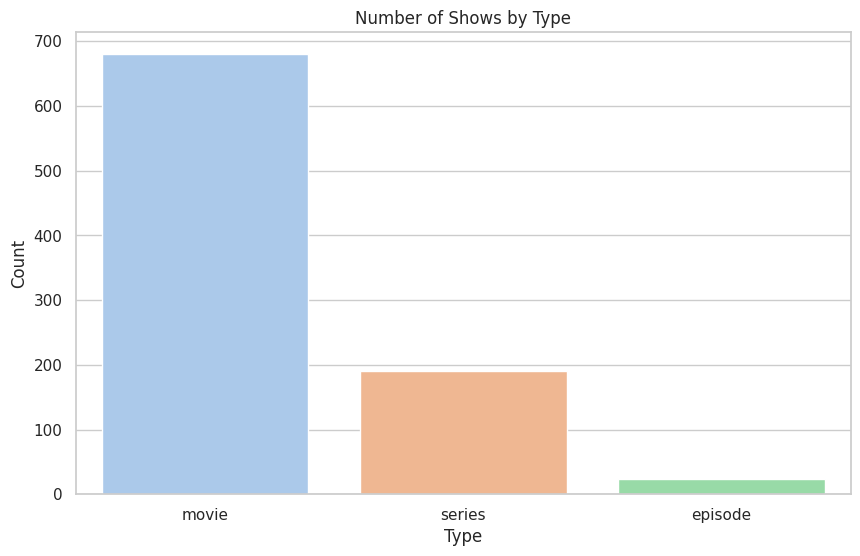

In [ ]:
if 'type' in df.columns:
    sns.countplot(data=df, x='type', palette='pastel')
    plt.title("Number of Shows by Type")
    plt.xlabel("Type")
    plt.ylabel("Count")
    plt.show()


In [ ]:
df.columns


Index(['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at',
       'added_at', 'runtime', 'genre', 'director', 'writer', 'actors',
       'language', 'country', 'awards', 'metascore', 'imdb_rating',
       'imdb_votes'],
      dtype='object')

/tmp/ipython-input-2478279272.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


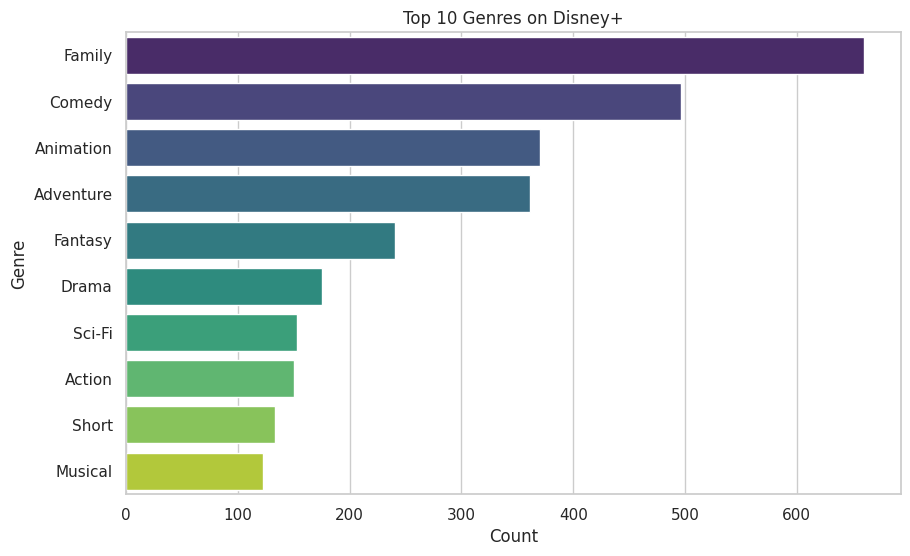

In [ ]:


# Drop NaN values and split comma-separated genres
genres_series = df['genre'].dropna()
all_genres = genres_series.str.split(",").explode().str.strip()

# Count the most common genres
top_genres = all_genres.value_counts().head(10)

# Plot using Seaborn
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Genres on Disney+")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()



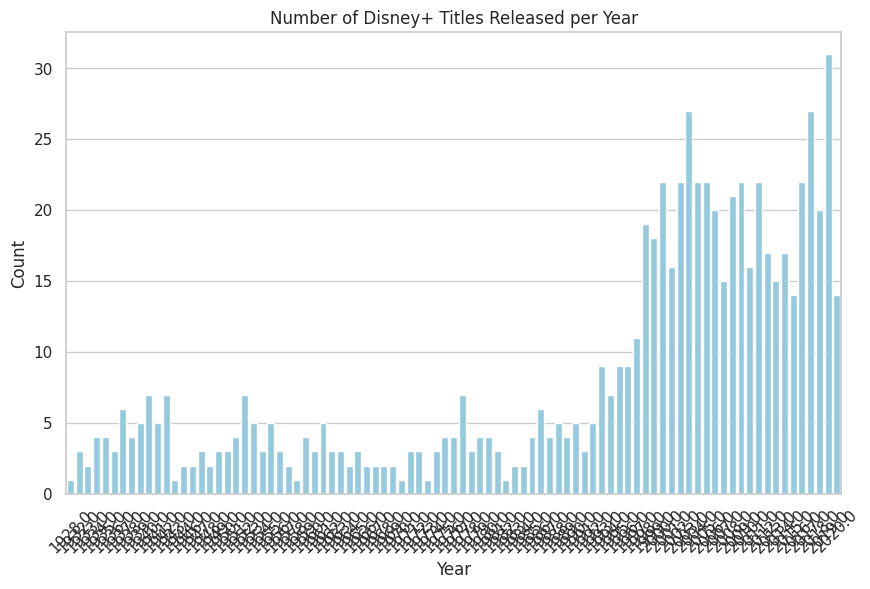

In [ ]:
# --- Number of Disney+ Titles Released per Year ---

# Check if 'year' column exists
if 'year' in df.columns:
    # Convert to numeric (in case some values are strings)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')

    # Drop missing values
    df_clean = df.dropna(subset=['year'])

    # Sort years
    df_clean = df_clean.sort_values(by='year')

    # Plot
    sns.countplot(data=df_clean, x='year', color='skyblue')
    plt.xticks(rotation=45)
    plt.title("Number of Disney+ Titles Released per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()
else:
    print("No 'year' column found in the dataset.")


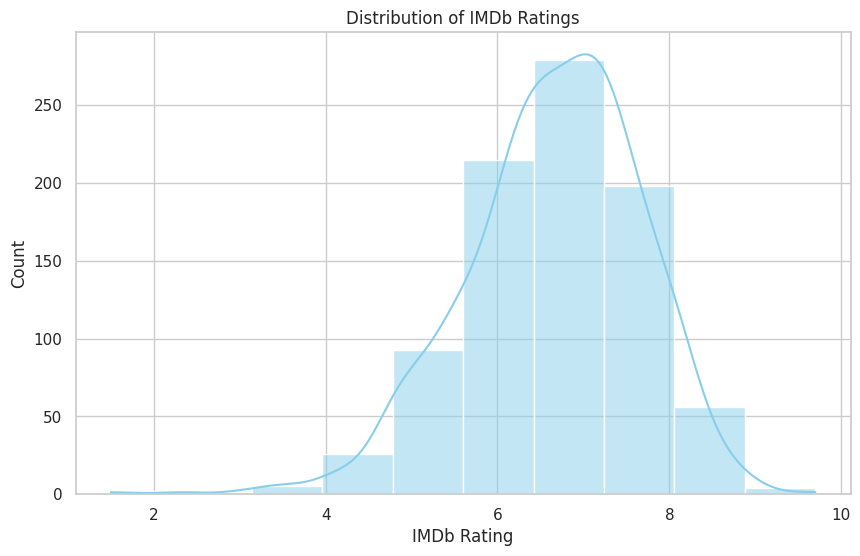

In [ ]:
# --- Distribution of IMDb Ratings ---
if 'imdb_rating' in df.columns:
    df_clean = df.dropna(subset=['imdb_rating'])
    sns.histplot(df_clean['imdb_rating'], bins=10, kde=True, color='skyblue')
    plt.title("Distribution of IMDb Ratings")
    plt.xlabel("IMDb Rating")
    plt.ylabel("Count")
    plt.show()
else:
    print("imdb_rating' column not found!")


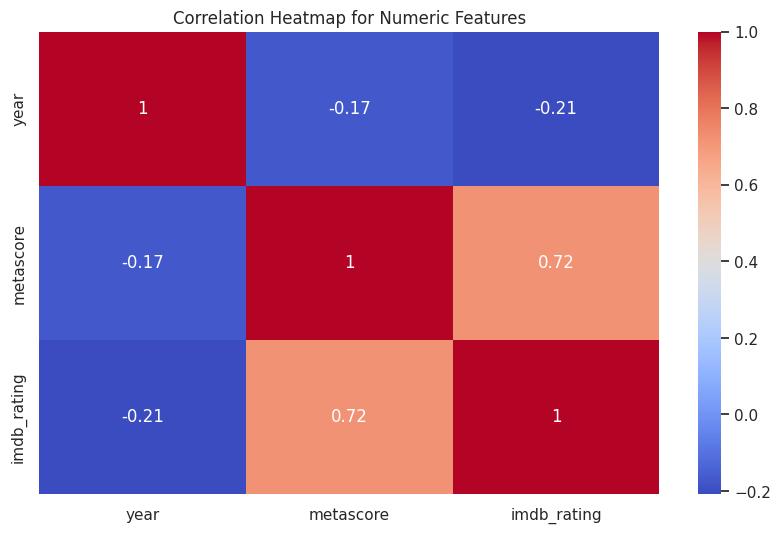

In [ ]:
numeric_df = df.select_dtypes(include='number')
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap for Numeric Features")
    plt.show()
